# 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import xlwings as xw

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

# 2.

In [2]:
caminho_drive_passivo_novo = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\1. ARQUIVOS B3\FORMATADOS\GAME\2. FEV"
caminho_drive_passivo_antigo = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\1. ARQUIVOS B3\FORMATADOS\GAME\2. FEV"
suporte_codigo = r"G:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\6. ARQUIVOS_SUPORTE_CÓDIGO"
dfNOVA = pd.read_excel(f"{caminho_drive_passivo_novo}\\18.02.xlsx")
dfANTIGA = pd.read_excel(f"{caminho_drive_passivo_antigo}\\13.02.xlsx")
grupos = pd.read_excel(f"{suporte_codigo}\\Grupos_cotistas.xlsx")

#INSIRO O CAMINHO DAS FONTES
caminho_Avenir = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Avenir Next LT Pro Regular.otf'
caminho_Geometeos = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Geometos Rounded.ttf'

#ALIMENTO DUAS VARIAVEIS COM AS FONTES
Avenir = fm.FontProperties(fname=caminho_Avenir)
Geometeos = fm.FontProperties(fname=caminho_Geometeos)

#FAÇO O MATPLTOLIB RECONHEÇER AS FONTES COMO FAMILIARIES
plt.rcParams['font.family'] = Avenir.get_name()
plt.rcParams['font.family'] = Avenir.get_name()

# 3.

In [3]:
#FAÇO UMA VERIFICAÇÃO PARA VER SE OS DOIS ARQUIVOS POSSUEM A MESMA QUANTIDADE DE COTAS
antg = dfANTIGA['TOTAL'].sum()
nov = dfNOVA['TOTAL'].sum()
#VALOR COTA DIA
cota_d_1 = 9.15
#QUANTIDADE COTAS NEGOCIADAS
cotas_dia = 8849
#DATA DA ANALISE
data = datetime(2026, 2, 18)
print('NOVO {}, ANTIGO {}'.format(nov, antg))

NOVO 21697677, ANTIGO 21697677


# 4.

In [4]:
def categorias(cat):
    if cat > 0 and cat <= 1000:
        return 1
    elif cat > 1000 and cat <= 5000:
        return 2
    elif cat > 5000 and cat <=20000:
        return 3
    elif cat > 20000 and cat <= 50000:
        return 4
    elif cat > 50000 and cat <= 100000:
        return 5
    elif cat > 100000 and cat<=500000:
        return 6
    elif cat > 500000 and cat <= 1000000:
        return 7
    elif cat > 1000000 and cat <= 3000000:
        return 8
    elif cat > 3000000 and cat <= 15000000:
        return 9
    elif cat > 15000000:
        return 10
    else:
        return 11
    

def movimentação(valor):
    if valor == 0:
        return 'Não Movimentou'
    else:
        return 'Movimentou'

def operação(x):
    if x < 0:
        return 'Venda'
    elif x == 0:
        return 'Manteve'
    else:
        return 'Compra'

def tag(x):
    if x == 'ASSOCIACAO CARIATATIVO-LITERARIA SAO JOSE':
        return 1
    elif x == 'BB FUNDO DE FUNDOS - FUNDO DE INVESTIMENTO IMOBILIARIO' or x == 'BB PREVIDENCIA MULTIMERCADO ALOCACAO IMOBLIARIA FI':
        return 2
    elif x == 'RIO BRAVO CAMPECHE FIC DE FIM' or x == 'RIO BRAVO FUNDO DE FII' or x == 'RIO BRAVO VALOR IMOBILIRIO MASTER FUNDO DE INVESTIMENTO EM C' or x == 'CAIXA RIO BRAVO FUNDO DE FI IMOBILIARIO FI' or x == 'CAIXA RIO BRAVO FUNDO DE FI IMOBILIARIO II':
        return 3
    elif x == 'REAL INVESTOR 70 PREVIDENCIA FIM' or x == 'REAL INVESTOR FUNDO DE INVESTIMENTO IMOBILIÁRIO' or x == 'REAL INVESTOR IMOBILIARIO MASTER FIC DE FIM CP':
        return 4
    else:
        return 0



def tratar_venda(tipo, val):
    if tipo == 'Venda' and val <0:
        val = val*-1
        return val
    else:
        return val


def realizar_calculo(w, t_atual, t_novo, calculo):
    if w > 0:
        calculo = t_atual - t_novo
        return calculo
    if w == 0:
        return w

# 5.

In [5]:
#POR MEIO DA VARIAVEL DOCUMENTO EU ENCONTRO COTISTAS EXISTEM NA DFNOVA E NÃO EXISTE NA DFANTIGA, ASSIM EU CONSIGO VALIDAR QUANTOS COTISTAS NOVOS ENTRARAM
NC = dfNOVA[~dfNOVA['DOCUMENTO'].isin(dfANTIGA['DOCUMENTO'])]
#RENOMEIO A COLUNA DE TOTAL PARA TOTAL NOVO PARA EVENTUALMENTE CONCATENAR ESSE DATAFRAME NO DATAFRAME ATUAL DE MANEIRA CORRETA
NC = NC.rename(columns = {'TOTAL':'TOTAL_NOVO'})
#VERIFICO A QUANTIDADE DE COTAS EM POSSE DE COTISTAS NOVOS
teste2 = NC['TOTAL_NOVO'].sum()
#RETORNO DA QUANTIDADE DE COTAS NOVAS
teste2

novos_cotistas = NC['DOCUMENTO'].nunique()

#RETORNO DA QUANTIDADE DE COTAS NOVAS
print('O numero de novos cotistas foi de {}, e a quantidade de cotas em posse de novos cotistas foi de {}'.format(novos_cotistas, teste2))

O numero de novos cotistas foi de 88, e a quantidade de cotas em posse de novos cotistas foi de 2666


# 6.

In [6]:
#FAÇO UMA VERIFICAÇÃO DE DUPLICADOS
duplicado = dfANTIGA[dfANTIGA['DOCUMENTO'].duplicated(keep = False)]
#RETORNO DA VERIFICAÇÃO DE DUPLICADOS
duplicado

,CHAVE,DOCUMENTO,NOME,PF_PJ,TOTAL


# 7.

In [7]:
#FAÇO A UNIÃO USANDO O DF ANTIGO COMO BASE.
merge_df = pd.merge(dfANTIGA, dfNOVA[['DOCUMENTO', 'TOTAL']],
                    on = ['DOCUMENTO'],
                    how = 'left',
                    suffixes = ('', '_NOVO'))
#VERIFICO SE A QUANTIDADE DE COTAS DO DF ATUAL NÃO FOI ALTERADO, O NUMERO INCIALMENTE É MENOR POIS OS NOVOS COTISTAS NÃO FORAM ADICIONADOS
teste4 = merge_df['TOTAL_NOVO'].sum()
#RETORNO DA QUANTIDADE DE COTAS
teste4

np.float64(21695011.0)

# 8.

In [8]:
#RESULTADO DO DATAFRAME DA UNIÃO
merge_df

,CHAVE,DOCUMENTO,NOME,PF_PJ,TOTAL,TOTAL_NOVO
0,00000308560JAYSON FABIO SANTOS,308560,JAYSON FABIO SANTOS,PF,1,1.0
1,00001419170FERNANDO AUGUSTO BENEDETTI FAR,1419170,FERNANDO AUGUSTO BENEDETTI FARACCO,PF,1,1.0
2,00001744674SIMONE REGINA BALLESTEROS COEL,1744674,SIMONE REGINA BALLESTEROS COELHO,PF,1000,1000.0
3,00002743213FERNANDO VICTOR FEITOSA DA LUZ,2743213,FERNANDO VICTOR FEITOSA DA LUZ,PF,100,100.0
4,00002827662LUCIANO PESSOA DE ALMEIDA,2827662,LUCIANO PESSOA DE ALMEIDA,PF,30,30.0
...,...,...,...,...,...,...
21211,99927179391FABIO SABOIA DE MENEZES,99927179391,FABIO SABOIA DE MENEZES,PF,608,608.0
21212,99930080015LUCIANO DA COSTA GONCALVES,99930080015,LUCIANO DA COSTA GONCALVES,PF,15,15.0
21213,99969998404JAMESON ALVES DE LIMA,99969998404,JAMESON ALVES DE LIMA,PF,50,50.0
21214,99971810506IVAN CARDOSO ALVES,99971810506,IVAN CARDOSO ALVES,PF,200,200.0


# 9.

In [9]:
df_agrupado = merge_df.groupby(['DOCUMENTO']).size().reset_index(name='Quantidade')
#FAÇO A VERIFICAÇÃO PARA DESCOBRIR SE APÓS A UNIÃO DOS DATAFRAMES ALGUM COTISTA FOI DUPLICADO
df_duplicados = df_agrupado[df_agrupado['Quantidade'] > 1]
#RETORNO DA VERIFICAÇÃO
print(df_duplicados)

Empty DataFrame
Columns: [DOCUMENTO, Quantidade]
Index: []


# 10.


In [10]:
# CRIANDO UM NOVO DATAFRAME QUE É A CONCATENAÇÃO DO DATAFRAME DA UNIÃO DO ANTIGO COM O NOVO E O DATAFRAME QUE CONTÉM APENAS OS NOVOS COTISTAS
df_final = pd.concat([merge_df, NC])
# VERIFICANDO SE O TOTAL NOVO TEM A MESMA QUANTIDADE DE COTISTAS QUE O DF NOVO (ESSE NUMERO DEVE BATER, CASO DE DIFERENÇA, É PORQUE EXISTEM COTISTAS SENDO CONSIDERADOS A MAIS OU A MENOS)
teste6 = df_final['TOTAL_NOVO'].sum()
#RESULTADO DA VERIFICAÇÃO
teste6

np.float64(21697677.0)

# 11.

In [11]:
#PREÇO DO DIA ANALISADO

#TROCANDO OS VALORES DE NOT A NUMBER POR 0
df_final['TOTAL_NOVO'] = df_final['TOTAL_NOVO'].fillna(0)
df_final['TOTAL'] = df_final['TOTAL'].fillna(0)

#CRIANDO A COLUNA DE VARIAÇÃO DE COTAS
df_final['VAR_COTAS'] = df_final['TOTAL_NOVO'] - df_final['TOTAL']

#SUBSTITUINDO OS 0 POR 0.0001
#df_final['VAR_COTAS'] = df_final['VAR_COTAS'].replace(0, 0.0001)

#CRIANDO UMA COLUNA QUE INDICA O TIPO DE OPERAÇÃO
df_final['OPERAÇÃO'] = df_final['VAR_COTAS'].apply(operação)

#CRIANDO AS COLUNAS COM VALORES MONETARIOS
df_final['FINANCEIRO_ATUAL'] = df_final['TOTAL']*cota_d_1
df_final['FINANCEIRO_NOVO'] = df_final['TOTAL_NOVO']*cota_d_1
df_final['VAR_PRECO'] = df_final['VAR_COTAS']*cota_d_1

#df_final['TAG'] = df_final['NOME'].apply(tag)

#troca = {1:'ASSOCIACAO CARITATIVO', 2:'BB', 3:'RIO BRAVO', 4:'REAL INVESTOR'}

#df_final['GRATIS'] = df_final['TAG'].map(troca)

#df_final['NOME'] = df_final.apply(lambda row: row['GRATIS'] if row['TAG'] > 0 else row['NOME'], axis=1)

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

#CRIANDO AS CATEGORIAS BASEADO NO FINANCEIRO_ATUAL
df_final['CATEGORIAS'] = np.where(df_final['FINANCEIRO_ATUAL'] > 0,
                                  df_final['FINANCEIRO_ATUAL'].apply(categorias),
                                  df_final['FINANCEIRO_NOVO'].apply(categorias))
#CRIANDO A COLUNA DE CATEGORIAS ATUAIS BASEADO NO FINANCEIRO_NOVO
df_final['CATEGORIAS ATUAIS'] = np.where(df_final['FINANCEIRO_NOVO'] >= 0,
                                  df_final['FINANCEIRO_NOVO'].apply(categorias),
                                  df_final['FINANCEIRO_ATUAL'].apply(categorias))

#CRIANDO UMA NOVA COLUNA DE CATEGORIAS ANTIGAS E MAPEANDO ELAS, PARA DEIXAR NA FORMA DE FAIXA DE INVESTIMENTO
df_final['CATEGORIAS ANTIGAS'] = df_final['CATEGORIAS'].map(mapear)
df_final['CATEGORIAS ATUAIS'] = df_final['CATEGORIAS ATUAIS'].map(mapear)

#============================================================================== FILTRANDO O DATAFRAME ==============================================================================#

#CRIO UM NOVO DATAFRAME EXCLUINDO OS MANTEVE, POIS ELES SÃO DESNECESSARIOS PARA AS ANALISES QUE QUERO FAZER
#df_final_filtrado = df_final[df_final['OPERAÇÃO'] != 'Manteve']

#ALTERO O VALOR DE VENDA DE NEGATIVO PARA POSITIVO
df_final['VAR_PRECO'] = np.where(df_final['OPERAÇÃO'] == "Venda", 
                                                 df_final['VAR_PRECO']* -1,
                                                 df_final['VAR_PRECO'])

#FAÇO A SOMA DE TODAS AS MOVIMENTAÇÕES QUE ACONTECERAM NO PERIODO NOVO
delta_sum = df_final['VAR_PRECO'].sum()

#CRIO UMA COLUNA DE % DE PARTICIPAÇÃO DE ACORDO COM A % QUE A MOVIMENTAÇÃO TEVE NO VOLUME DO DIA
df_final['Participação'] = (df_final['VAR_PRECO']/delta_sum)*100

#COLOCO EM %
df_final['Participação'] = df_final['Participação'].apply(lambda x: f'{x:.3f}%')

df_final['FINANCEIRO_ATUAL'] = df_final['FINANCEIRO_ATUAL'].round(2)
df_final['FINANCEIRO_NOVO'] = df_final['FINANCEIRO_NOVO'].round(2)
df_final['VAR_PRECO'] = df_final['VAR_PRECO'].round(2)

#COLUNA SUPORTE PARA CRIAR OS GRÁFICOS
df_final['Participação_sup'] = (df_final['VAR_PRECO']/delta_sum)*100


# 12.

In [12]:
df_final

,CHAVE,DOCUMENTO,NOME,PF_PJ,TOTAL,TOTAL_NOVO,VAR_COTAS,OPERAÇÃO,FINANCEIRO_ATUAL,FINANCEIRO_NOVO,VAR_PRECO,CATEGORIAS,CATEGORIAS ATUAIS,CATEGORIAS ANTIGAS,Participação,Participação_sup
0,00000308560JAYSON FABIO SANTOS,308560,JAYSON FABIO SANTOS,PF,1.0,1.0,0.0,Manteve,9.15,9.15,0.00,1,0-1k,0-1k,0.000%,0.000000
1,00001419170FERNANDO AUGUSTO BENEDETTI FAR,1419170,FERNANDO AUGUSTO BENEDETTI FARACCO,PF,1.0,1.0,0.0,Manteve,9.15,9.15,0.00,1,0-1k,0-1k,0.000%,0.000000
2,00001744674SIMONE REGINA BALLESTEROS COEL,1744674,SIMONE REGINA BALLESTEROS COELHO,PF,1000.0,1000.0,0.0,Manteve,9150.00,9150.00,0.00,3,5k-20k,5k-20k,0.000%,0.000000
3,00002743213FERNANDO VICTOR FEITOSA DA LUZ,2743213,FERNANDO VICTOR FEITOSA DA LUZ,PF,100.0,100.0,0.0,Manteve,915.00,915.00,0.00,1,0-1k,0-1k,0.000%,0.000000
4,00002827662LUCIANO PESSOA DE ALMEIDA,2827662,LUCIANO PESSOA DE ALMEIDA,PF,30.0,30.0,0.0,Manteve,274.50,274.50,0.00,1,0-1k,0-1k,0.000%,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19388,71201963249KLEILSON ALESSANDRO BRITO LEAL,71201963249,KLEILSON ALESSANDRO BRITO LEAL,PF,0.0,20.0,20.0,Compra,0.00,183.00,183.00,1,0-1k,0-1k,0.194%,0.193986
19460,72334371300ANTONIO WELLINGTON LIMA SOARES,72334371300,ANTONIO WELLINGTON LIMA SOARES JUNIOR,PF,0.0,20.0,20.0,Compra,0.00,183.00,183.00,1,0-1k,0-1k,0.194%,0.193986
19965,81628358734DOMENICA LONGHI OLIVEIRA ANDRI,81628358734,DOMENICA LONGHI OLIVEIRA ANDRIGHI,PF,0.0,12.0,12.0,Compra,0.00,109.80,109.80,1,0-1k,0-1k,0.116%,0.116392
20028,82521310263ADRIANA CHAVES MONTEIRO,82521310263,ADRIANA CHAVES MONTEIRO,PF,0.0,2.0,2.0,Compra,0.00,18.30,18.30,1,0-1k,0-1k,0.019%,0.019399


# 13.

In [13]:
zeraram = (df_final['TOTAL_NOVO'] == 0).sum()
novos_cotistas = (df_final['TOTAL'] == 0).sum()
net = novos_cotistas-zeraram
print('temos {} cotistas que zeraram e {} novos cotistas e o net foi de {} cotistas'.format(zeraram, novos_cotistas, net))

mov_cotistas = {'CATEGORIAS':['Novos Cotistas', 'Zeraram', 'Net'],
                'QUANTIDADE':[novos_cotistas, zeraram, net]}

offset = 1e5

temos 58 cotistas que zeraram e 88 novos cotistas e o net foi de 30 cotistas


# 14.

In [14]:
df_teste = df_final[df_final['OPERAÇÃO'] == 'Manteve']

# 15.

In [15]:
duplicado_dffinal = df_final[df_final['DOCUMENTO'].duplicated(keep = False)]

duplicado_dffinal

,CHAVE,DOCUMENTO,NOME,PF_PJ,TOTAL,TOTAL_NOVO,VAR_COTAS,OPERAÇÃO,FINANCEIRO_ATUAL,FINANCEIRO_NOVO,VAR_PRECO,CATEGORIAS,CATEGORIAS ATUAIS,CATEGORIAS ANTIGAS,Participação,Participação_sup


# 16.

In [16]:
df_filtrad_venda = df_final.query('OPERAÇÃO == "Venda"') 
df_filtrad_compra = df_final.query('OPERAÇÃO == "Compra"')
df_filtrado_PF = df_final.query('PF_PJ == "PF"')
df_filtrado_PJ = df_final.query('PF_PJ == "PJ"')

#CRIANDO VARIAVEIS PARA DIVIDIR A QUANTIDADE DE COMPRA E VENDA
total_compra = df_final.query('OPERAÇÃO == "Compra"')['VAR_PRECO'].sum()
total_venda = df_final.query('OPERAÇÃO == "Venda"')['VAR_PRECO'].sum()

#COMPARANDO A QUANTIDADE DE COMPRA X VENDA (O VALOR DEVE SER IGUAL OU ESTAR PRÓXIMO, CASO A DIFERENÇA SEJA DISCREPANTE, SIGNIFICA QUE EXISTE ALGUM ERRO DE CALCULO OU SEPARAÇÃO)
print('O total financeiro de compra foi {}, e o total financeiro de vendas foi {}'.format(total_compra, total_venda))

O total financeiro de compra foi 47168.25, e o total financeiro de vendas foi 47168.24999999999


# 17.

In [17]:
#FAZENDO A MESMO VERIFICAÇÃO ACIMA SÓ QUE PARA COTAS
total_cotas_compra = df_final.query('OPERAÇÃO == "Compra"')['VAR_COTAS'].sum()
total_cotas_venda = df_final.query('OPERAÇÃO == "Venda"')['VAR_COTAS'].sum()

#COMPARANDO A QUANTIDADE DE COMPRA X VENDA (O VALOR DEVE SER IGUAL OU ESTAR PRÓXIMO, CASO A DIFERENÇA SEJA DISCREPANTE, SIGNIFICA QUE EXISTE ALGUM ERRO DE CALCULO OU SEPARAÇÃO)
print('O total de cotas compradas foi {}, e o total de cotas vendidas foi {}'.format(total_cotas_compra, total_cotas_venda))

O total de cotas compradas foi 5155.0, e o total de cotas vendidas foi -5155.0


# 18.

In [18]:

daytrade = cotas_dia-total_cotas_compra

part_B3 = (total_cotas_compra/cotas_dia)
part_daytrade = (daytrade/cotas_dia)

total_PF = df_final.query('PF_PJ == "PF"')['TOTAL_NOVO'].sum()
total_PJ = df_final.query('PF_PJ == "PJ"')['TOTAL_NOVO'].sum()
Total = df_final['TOTAL_NOVO'].sum()

part_pf = (total_PF/Total)
part_pj = (total_PJ/Total)

dados = {'B3':[part_B3],
        'DT':[part_daytrade],
        'PF':[part_pf],
         'PJ':[part_pj]}

tab_GAME11_b3xDT = pd.DataFrame(dados)

tab_GAME11_b3xDT

,B3,DT,PF,PJ
0,0.582552,0.417448,0.249711,0.750289


# 19.

In [19]:
plim = df_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(str)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,25720.65,Compra PF,54.53,0-1k
1,1,Manteve,PF,0.00,Manteve PF,0.00,0-1k
2,1,Manteve,PJ,0.00,Manteve PJ,0.00,0-1k
3,1,Venda,PF,-5416.80,Venda PF,-11.48,0-1k
4,2,Compra,PF,9561.75,Compra PF,20.27,1k-5k
5,2,Manteve,PF,0.00,Manteve PF,0.00,1k-5k
6,2,Manteve,PJ,0.00,Manteve PJ,0.00,1k-5k
7,2,Venda,PF,-12782.55,Venda PF,-27.10,1k-5k
8,3,Compra,PF,11593.05,Compra PF,24.58,5k-20k
9,3,Manteve,PF,0.00,Manteve PF,0.00,5k-20k


# 20.

In [20]:
def corrigir_categoria(plim):
    opp = plim['OPERAÇÃO'].unique()
    falta_compra = 'Compra' not in opp
    falta_venda = 'Venda' not in opp

    linhas_manteve = plim[plim['OPERAÇÃO'] == 'Manteve']
    
    for idx, row in plim.iterrows():
        if row['OPERAÇÃO'] == 'Manteve':
            if falta_venda:
                plim.at[idx, 'OPERAÇÃO'] = 'Venda'
                plim.at[idx, 'OPERAÇÃO_PF_PJ'] = f"Venda {row['PF_PJ']}"
                falta_venda = False
                continue
            elif falta_compra:
                plim.at[idx, 'OPERAÇÃO'] = 'Compra'
                plim.at[idx, 'OPERAÇÃO_PF_PJ'] = f"Compra {row['PF_PJ']}"
                falta_compra = False
                continue

    # Se ainda estiver faltando e só havia uma linha (ex: categoria 7 com apenas um "Manteve")
    if len(plim) == 1:
        row = plim.iloc[0]
        if falta_compra:
            nova_linha = row.copy()
            nova_linha['OPERAÇÃO'] = 'Compra'
            nova_linha['OPERAÇÃO_PF_PJ'] = f"Compra {row['PF_PJ']}"
            nova_linha['% PARTICIPAÇÃO'] = 0.0
            nova_linha['VAR_PRECO'] = 0.0
            plim = pd.concat([plim, pd.DataFrame([nova_linha])], ignore_index=True)
        elif falta_venda:
            nova_linha = row.copy()
            nova_linha['OPERAÇÃO'] = 'Venda'
            nova_linha['OPERAÇÃO_PF_PJ'] = f"Venda {row['PF_PJ']}"
            nova_linha['% PARTICIPAÇÃO'] = 0.0
            nova_linha['VAR_PRECO'] = 0.0
            plim = pd.concat([plim, pd.DataFrame([nova_linha])], ignore_index=True)

    return plim


df_corrigido = (
    plim.groupby('CATEGORIAS', group_keys=False)
    .apply(corrigir_categoria)
)

df_corrigido1 = pd.DataFrame(df_corrigido)

df_corrigido1

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_27644\846922973.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(corrigir_categoria)


,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,25720.65,Compra PF,54.53,0-1k
1,1,Manteve,PF,0.00,Manteve PF,0.00,0-1k
2,1,Manteve,PJ,0.00,Manteve PJ,0.00,0-1k
3,1,Venda,PF,-5416.80,Venda PF,-11.48,0-1k
4,2,Compra,PF,9561.75,Compra PF,20.27,1k-5k
5,2,Manteve,PF,0.00,Manteve PF,0.00,1k-5k
6,2,Manteve,PJ,0.00,Manteve PJ,0.00,1k-5k
7,2,Venda,PF,-12782.55,Venda PF,-27.10,1k-5k
8,3,Compra,PF,11593.05,Compra PF,24.58,5k-20k
9,3,Manteve,PF,0.00,Manteve PF,0.00,5k-20k


# 21.

In [21]:
graf1 = df_corrigido1.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

graf1.set_index('CATEGORIAS')

graf1['CATEGORIAS'] = graf1['CATEGORIAS'].astype(str)

graf1['VAR_PRECO'] = np.where(graf1['OPERAÇÃO'] == "Venda", 
                                                 graf1['VAR_PRECO']* -1,
                                                 graf1['VAR_PRECO'])

graf1['OPERAÇÃO_PF_PJ'] = graf1['OPERAÇÃO'] + ' ' + graf1['PF_PJ']

graf1 = graf1[graf1['OPERAÇÃO'] != 'Manteve']

graf1['% PARTICIPAÇÃO'] = ((graf1['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

graf1['CLASSE_CATEGORIA'] = graf1['CATEGORIAS'].map(mapeamento)

graf1['CATEGORIAS'] = graf1['CATEGORIAS'].astype(int)

graf1 = graf1.sort_values(by='CATEGORIAS')

graf1['VAR_PRECO'].astype(float)

graf1['VAR_PRECO'] = graf1['VAR_PRECO'].round(2)

graf1

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,25720.65,Compra PF,54.53,0-1k
3,1,Venda,PF,5416.80,Venda PF,11.48,0-1k
4,2,Compra,PF,9561.75,Compra PF,20.27,1k-5k
7,2,Venda,PF,12782.55,Venda PF,27.10,1k-5k
8,3,Compra,PF,11593.05,Compra PF,24.58,5k-20k
11,3,Venda,PF,20441.10,Venda PF,43.34,5k-20k
12,3,Venda,PJ,8527.80,Venda PJ,18.08,5k-20k
13,4,Compra,PF,183.00,Compra PF,0.39,20k-50k
15,4,Venda,PF,-0.00,Venda PF,-0.00,20k-50k
16,5,Compra,PJ,109.80,Compra PJ,0.23,50k-100k


# 22.

In [22]:
graf1 = df_corrigido1.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

graf1.set_index('CATEGORIAS')

graf1['CATEGORIAS'] = graf1['CATEGORIAS'].astype(str)

graf1['OPERAÇÃO_PF_PJ'] = graf1['OPERAÇÃO'] + ' ' + graf1['PF_PJ']

graf1 = graf1[graf1['OPERAÇÃO'] != 'Manteve']

graf1['% PARTICIPAÇÃO'] = ((graf1['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

graf1['CLASSE_CATEGORIA'] = graf1['CATEGORIAS'].map(mapeamento)

graf1['CATEGORIAS'] = graf1['CATEGORIAS'].astype(int)

graf1 = graf1.sort_values(by='CATEGORIAS')

graf1['VAR_PRECO'].astype(float)

graf1['VAR_PRECO'] = graf1['VAR_PRECO'].round(2)

graf1

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,25720.65,Compra PF,54.53,0-1k
3,1,Venda,PF,-5416.80,Venda PF,-11.48,0-1k
4,2,Compra,PF,9561.75,Compra PF,20.27,1k-5k
7,2,Venda,PF,-12782.55,Venda PF,-27.10,1k-5k
8,3,Compra,PF,11593.05,Compra PF,24.58,5k-20k
11,3,Venda,PF,-20441.10,Venda PF,-43.34,5k-20k
12,3,Venda,PJ,-8527.80,Venda PJ,-18.08,5k-20k
13,4,Compra,PF,183.00,Compra PF,0.39,20k-50k
15,4,Venda,PF,0.00,Venda PF,0.00,20k-50k
16,5,Compra,PJ,109.80,Compra PJ,0.23,50k-100k


# 23.

In [23]:
qtde_cotas = df_final.groupby(by = ['CATEGORIAS', 'PF_PJ'])['TOTAL_NOVO'].sum().reset_index()

qtde_cotas.set_index('CATEGORIAS')

qtde_cotas['CATEGORIAS'] = qtde_cotas['CATEGORIAS'].astype(str)

qtde_cotas['% TOTAL'] = (qtde_cotas['TOTAL_NOVO']/21697677)*100


# 1 - GRAFICO DE COTAS POR FAIXA DE INVESTIMENTO

# 24.

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

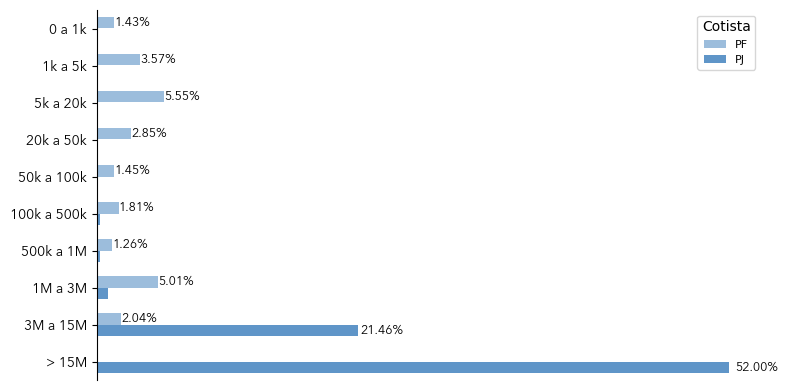

In [24]:
fig, ax = plt.subplots(figsize = (8, 4))

sb.barplot(data= qtde_cotas,
           x = '% TOTAL',
           y = 'CATEGORIAS',
           hue = 'PF_PJ',
           ax=ax,
           palette={'PF':'#91BDE7', 'PJ':'#4E95D9'},
           dodge=True,
           width = 0.6)


ylabels= [
    '0 a 1k',
    '1k a 5k',
    '5k a 20k',
    '20k a 50k',
    '50k a 100k',
    '100k a 500k',
    '500k a 1M',
    '1M a 3M',
    '3M a 15M',
    '> 15M'
]

ax.set_yticks(range(len(ylabels)))
ax.set_yticklabels(ylabels, fontsize=9, fontproperties = Avenir)
#ax.set_yticklabels(graf['CATEGORIAS'].unique())
#ax.yaxis.set_tick_params(labelsize = (14))

for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x) >= 1:
        ax.text(
            x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{x:.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            fontproperties=Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)




# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Cotista', loc='upper right', fontsize = 8)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COTAS_POR_CATEGORIA_GAME.png', transparent = True, dpi=300, bbox_inches='tight')

plt.show()

# BASE PARA GRÁFICO DE COMPRA POR CATEGORIAS

# 25.

In [25]:
graf_compra = graf1[graf1['OPERAÇÃO'] == 'Compra']

#graf_compra['VAR_PRECO'] = np.where(graf_compra['PF_PJ'] == 'PJ', 
 #                                               graf_compra['VAR_PRECO']+0.20,
  #                                              graf_compra['VAR_PRECO'])

#graf_compra = graf_compra[graf_compra['VAR_PRECO'] > 0.01]

graf_compra['CATEGORIAS'] = graf_compra['CATEGORIAS'].astype(str)

#graf_compra['OPERAÇÃO_PF_PJ'] = graf_compra['OPERAÇÃO'] + ' ' + graf_compra['PF_PJ']

graf_compra['VAR_PRECO'] = graf_compra['VAR_PRECO']

graf_compra['% PARTICIPAÇÃO'] = ((graf_compra['VAR_PRECO']/(total_venda))*100).round(2)

graf_compra['CLASSE_CATEGORIA'] = graf_compra['CATEGORIAS'].map(mapeamento)

graf_compra

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_27644\3911663413.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graf_compra['CATEGORIAS'] = graf_compra['CATEGORIAS'].astype(str)
C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_27644\3911663413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graf_compra['VAR_PRECO'] = graf_compra['VAR_PRECO']
C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_27644\3911663413.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,25720.65,Compra PF,54.53,0-1k
4,2,Compra,PF,9561.75,Compra PF,20.27,1k-5k
8,3,Compra,PF,11593.05,Compra PF,24.58,5k-20k
13,4,Compra,PF,183.00,Compra PF,0.39,20k-50k
16,5,Compra,PJ,109.80,Compra PJ,0.23,50k-100k
18,6,Compra,PJ,0.00,Compra PJ,0.00,100k-500k
20,7,Compra,PJ,0.00,Compra PJ,0.00,500k-1M
22,8,Compra,PJ,0.00,Compra PJ,0.00,1M-3M
24,9,Compra,PJ,0.00,Compra PJ,0.00,3M-15M
26,10,Compra,PJ,0.00,Compra PJ,0.00,>15M


# 26.

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_27644\216820582.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(graf1['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next L

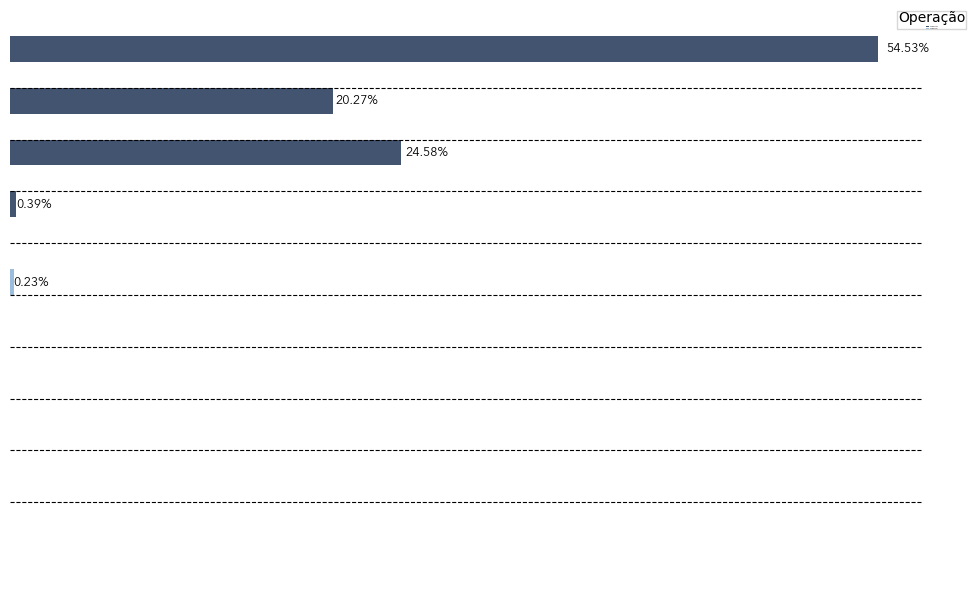

In [26]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=graf_compra, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(graf1['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(graf1['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ_GAME', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

# BASE PARA GRAFICO DE VENDA POR CATEGORIAS

# 27.

In [27]:
graf_venda1 = graf1[graf1['OPERAÇÃO'] != 'Compra']

graf_venda = graf_venda1[graf_venda1['OPERAÇÃO_PF_PJ'] != 'Compra PJ']

graf_venda['CATEGORIAS'] = graf_venda['CATEGORIAS'].astype(str)

#graf_compra['OPERAÇÃO_PF_PJ'] = graf_compra['OPERAÇÃO'] + ' ' + graf_compra['PF_PJ']

graf_venda['VAR_PRECO'] = graf_venda['VAR_PRECO']

graf_venda['% PARTICIPAÇÃO'] = ((graf_venda['VAR_PRECO']/(total_venda))*100).round(2)

graf_venda['CLASSE_CATEGORIA'] = graf_venda['CATEGORIAS'].map(mapeamento)

graf_venda

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
3,1,Venda,PF,-5416.80,Venda PF,-11.48,0-1k
7,2,Venda,PF,-12782.55,Venda PF,-27.10,1k-5k
11,3,Venda,PF,-20441.10,Venda PF,-43.34,5k-20k
12,3,Venda,PJ,-8527.80,Venda PJ,-18.08,5k-20k
15,4,Venda,PF,0.00,Venda PF,0.00,20k-50k
17,5,Venda,PF,0.00,Venda PF,0.00,50k-100k
19,6,Venda,PF,0.00,Venda PF,0.00,100k-500k
21,7,Venda,PF,0.00,Venda PF,0.00,500k-1M
23,8,Venda,PF,0.00,Venda PF,0.00,1M-3M
25,9,Venda,PF,0.00,Venda PF,0.00,3M-15M


# 3 - GRAFICO DE VENDA POR CATEGORIAS

# 28.

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_27644\2072725224.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(graf1['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next 

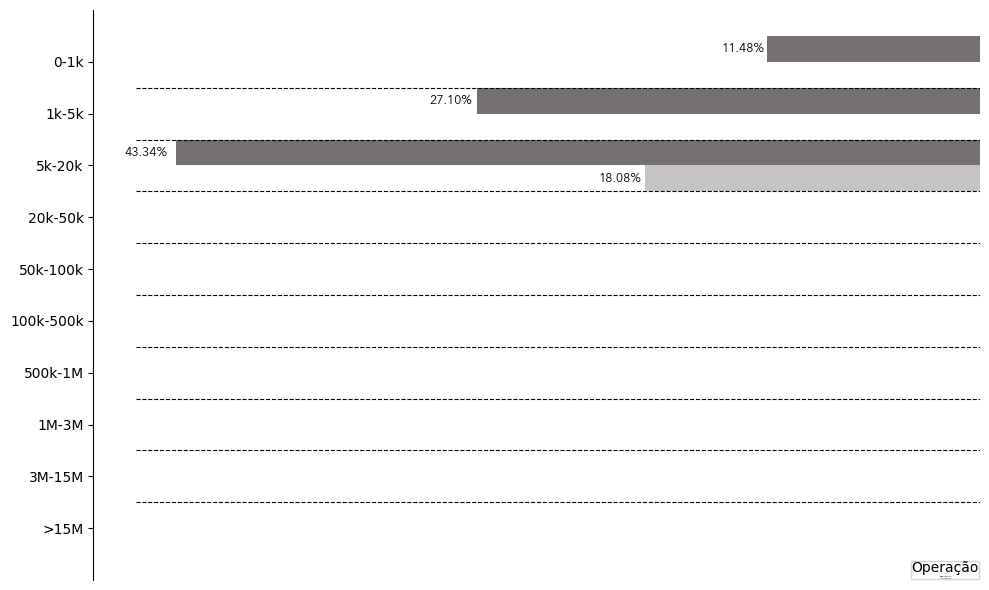

In [28]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=graf_venda, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(graf1['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(graf1['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ_GAME', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

# CRIANDO OS TOP 10 QUANTIDADE DE COTAS (PF E PJ)

### MAIORES COMPRADORES

# 29.

In [29]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'

TOP10_Compra = df_final.query('OPERAÇÃO == "Compra"')[[Nome,cat,tipo,fin_mov,cat_atuais]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra = TOP10_Compra.set_index('NOME')

TOP10_Compra

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS
NOME,,,,
WILDES GONCALVES DOS SANTOS,5k-20k,PF,9516.00,5k-20k
MARCELO BOSCHETTI DE MELO,0-1k,PF,9150.00,5k-20k
MATEUS ALMEIDA MENDES,1k-5k,PF,2745.00,1k-5k
MARCELO RAMOS ALVIM,1k-5k,PF,1555.50,1k-5k
PATRICK WESLEY DOS REIS,1k-5k,PF,1454.85,1k-5k
MATHEUS RADOVANOVICH,5k-20k,PF,1372.50,5k-20k
FERNANDA INACIO SOUSA,1k-5k,PF,1253.55,1k-5k
ALANA KAROLINA COSTA,0-1k,PF,979.05,0-1k
LUCAS DAMBROS DA SILVA,0-1k,PF,951.60,1k-5k


### MAIORES VENDEDORES

# 30.

In [30]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = df_final.query('OPERAÇÃO == "Venda"')[[Nome,cat,tipo,fin_mov,cat_atuais]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Venda = TOP10_Venda.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS ATUAIS'] = TOP10_Venda['CATEGORIAS ATUAIS'].fillna('0-1K')

TOP10_Venda

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS
NOME,,,,
XTX MARKETS TRADING LIMITED,5k-20k,PJ,8527.80,0-1K
WILLIAM CRAVO CAMPOS,5k-20k,PF,7548.75,0-1K
RAPHAEL SEABRA BAHIA,5k-20k,PF,6862.50,0-1K
ANGELA MARIA MARIANO BATISTA DA SILVA,1k-5k,PF,4575.00,0-1K
THIAGO HENRIQUE DE CAMPOS,5k-20k,PF,4346.25,1k-5k
RAFAEL DE FREITAS TEIXEIRA,1k-5k,PF,3733.20,0-1K
JOAO ALBERTO IGNACIO PEREIRA,5k-20k,PF,1226.10,5k-20k
GABRIEL PAULINO NOGUEIRA,1k-5k,PF,1189.50,0-1K
NATALIA MOURA GOMES LEAL,1k-5k,PF,1052.25,1k-5k


# 31.

In [31]:
# Criar o Top 10 geral sem diversificar entre PF e PJ
TOP10_Geral = df_final[[Nome, tipo, cat, qtde]]

# Ordenar os valores pela coluna 'TOTAL_NOVO' em ordem decrescente e pegar os 10 maiores
TOP10_Geral = TOP10_Geral.sort_values(by=['TOTAL_NOVO'], ascending=False).iloc[:25, :]

# Renomear a coluna 'TOTAL_NOVO' para 'COTAS'
TOP10_Geral = TOP10_Geral.rename(columns={'TOTAL_NOVO': 'COTAS'})

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Geral['CATEGORIAS'] = TOP10_Geral['CATEGORIAS'].map(mapear)

# Exibir o resultado
TOP10_Geral

,NOME,PF_PJ,CATEGORIAS,COTAS
18867,GUARDIAN STRATEGY FII DE RL,PJ,>15M,7283468.0
9436,FATOR VERITA FUNDO DE INVESTIMENTO IMOBILIARIO,PJ,>15M,4000000.0
21048,MAXI RENDA FUNDO DE INVESTIMENTO IMOBILIARIO -...,PJ,3M-15M,1482430.0
13336,FDO INV IMOB - FII RBR RENDIMENTO HIGH GRADE,PJ,3M-15M,1231551.0
18593,OPORTUNIDADES IMOBILI RIAS I FUNDO DE INVESTIM...,PJ,3M-15M,1111558.0
12396,FDO INV. MAUA CAPITAL RECEBIVEIS IMOB. - FII,PJ,3M-15M,830957.0
18607,ARMEN YEGHIA ASDOURIAN,PF,3M-15M,443264.0
11985,GILBERTO SCHINCARIOL JUNIOR,PF,1M-3M,259117.0
18012,MANAT RECEBVEIS ESTRUTURADOS FUNDO DE INVESTIM...,PJ,1M-3M,206207.0
8828,MARCOS FERRAZ DE REZENDE,PF,1M-3M,200000.0


# 32.

In [32]:
#FAZENDO A ALTERAÇÃO DO VALOR ADICIONANDO O VALOR NOVO NO LUGAR DOS ANTIGOS (PARA AQUELES COTISTAS QUE MOVIMENTARAM)
df_final['TOTAL_FINAL'] = np.where(df_final['OPERAÇÃO'].isin(['Compra', 'Venda']),
                                   df_final['TOTAL_NOVO'],
                                   df_final['TOTAL'])

df_final1 = df_final.drop(columns = ['TOTAL_NOVO', 'TOTAL', 'VAR_COTAS', 'FINANCEIRO_ATUAL', 'FINANCEIRO_NOVO', 'VAR_PRECO', 'CATEGORIAS'])

#RENOMEANDO A COLUNA DE TOTAL FINAL PARA TOTAL
merge2 = df_final1.rename(columns = {'TOTAL_FINAL':'TOTAL'})

# EXCLUINDO TODAS AS LINHAS QUE SÃO IGUAIS A 0
merge2 = merge2[merge2['TOTAL'] != 0 ]

#VERIFICANDO A QUANTIDADE DE COTAS (ESSE VALOR DEVE SER IGUAL OU EXTREMAMENTE PROXIMO DO VALOR DE COTAS DO TOTAL DO DF ANTIGO, ESSE NUMERO NÃO DEVE SE ALTERAR NUNCA)
Tcotas = merge2['TOTAL'].sum()
Tcotistas = merge2['DOCUMENTO'].value_counts()
Tcotistas = merge2['DOCUMENTO'].nunique()

print('O total de cotistas é de {}, e o total de cotas é {}'.format(Tcotistas, Tcotas))


O total de cotistas é de 21246, e o total de cotas é 21697677.0


In [33]:
#FAÇO A UNIÃO USANDO O DF ANTIGO COMO BASE.
df_grupos = pd.merge(df_final, grupos[['DOCUMENTO', 'GRUPO']],
                    on = ['DOCUMENTO'],
                    how = 'left')

df_grupos = df_grupos.fillna('SEM GRUPO')
agrupados = df_grupos.query('GRUPO != "SEM GRUPO"')
agrupados = agrupados.groupby(['GRUPO'])['TOTAL_NOVO'].sum()

agrupados = pd.DataFrame(agrupados)
agrupados

,TOTAL_NOVO
GRUPO,
CAPITANIA,1211673.0
FATOR,4000000.0
GUARDIAN,7300315.0
MANATI,206207.0
MAUA,830957.0
RBR,1231551.0
XP,1482430.0


# 33.

In [34]:
net_cotistas = {'TOTAL':[Tcotistas],
        'Entraram':[novos_cotistas],
        'Sairam':[zeraram],
        }

tab_C = pd.DataFrame(net_cotistas)

tab_C

,TOTAL,Entraram,Sairam
0,21246,88,58


# 34.

In [35]:
base_semanal = df_final.drop(columns=['CHAVE', 'Participação'])
base_semanal['CATEGORIAS ATUAIS'] = base_semanal['CATEGORIAS ATUAIS'].fillna('0-1k')
base_semanal['% TOTAL'] = (base_semanal['TOTAL_FINAL']/21697677)
base_semanal['DATA'] = data
base_semanal_compra = base_semanal[base_semanal['OPERAÇÃO'] == 'Compra']
base_semanal_venda = base_semanal[base_semanal['OPERAÇÃO'] == 'Venda']

# 35.

In [36]:
from openpyxl import load_workbook

def adicionar_dados_planilha(caminho_arquivo, nome_planilha, novos_dados):
    """
    Adiciona dados ao final de uma planilha do Excel existente.
    """
    try:
        # Verificar se o arquivo existe e carregar
        with pd.ExcelWriter(
            caminho_arquivo,
            engine='openpyxl',
            mode='a',  # Abre o arquivo em modo "append"
            if_sheet_exists='overlay'  # Permite adicionar dados a uma aba existente
        ) as writer:
            # Carregar a aba
            arquivo = load_workbook(caminho_arquivo)
            if nome_planilha in arquivo.sheetnames:
                sheet = arquivo[nome_planilha]
                # Encontrar a última linha preenchida
                last_row = sheet.max_row
                # Adicionar dados após a última linha
                novos_dados.to_excel(writer, sheet_name=nome_planilha, startrow=last_row, index=False, header=False)
            else:
                # Criar uma nova aba se a aba não existir
                novos_dados.to_excel(writer, sheet_name=nome_planilha, index=False)
        print("Dados adicionados com sucesso.")
    except Exception as e:
        print(f"Erro ao adicionar dados: {e}")

# Exemplo de uso
caminho_semanal = r'g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\2. SEMANAL\GAME\BASE_SEMANAL.xlsx'
caminho_mensal = r'g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GAME\BASE_MENSAL_GAME_JAN.xlsx'
nome_planilha = 'Planilha1'
nome_plan_mensal = 'Planilha1'
# Novo DataFrame para adicionar
new_compra = (base_semanal_compra)
new_venda = (base_semanal_venda)

#Chamando a função

#----SEMANAL----#
#adicionar_dados_planilha(caminho_semanal, nome_planilha, new_compra)
#adicionar_dados_planilha(caminho_semanal, nome_planilha, new_venda)
#----MENSAL----#
#adicionar_dados_planilha(caminho_mensal, nome_plan_mensal, new_compra)
#adicionar_dados_planilha(caminho_mensal, nome_plan_mensal, new_venda)

# 36.

In [ ]:
from pptx import Presentation
from pptx.util import Inches, Pt, Cm

#Caminho do PowerPoint1
caminho_ppt = r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\1. DIARIOS\GAME\Relatório_Passivos_GAME11_base.pptx"
imagem_path_cotas_por_faixa = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\COTAS_POR_CATEGORIA_GAME.png"
imagem_path_venda = r"c:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\VENDA_PF_E_PJ_GAME.png"
imagem_path_compra = r"\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\COMPRA_PF_E_PJ_GAME.png"

#Abre a apresentação
prs = Presentation(caminho_ppt)

#Selecionando o primeiro slide
slide = prs.slides[0]

#Define a posição e o tamanho da imagem
#Imagem Gráfico Cota por categoria
left = Cm(0.05)
top = Cm(23.36)
width = Cm(10.42)
height = Cm(5.19)

#Imagem Gráfico Venda
leftV = Cm(0.06)
topV = Cm(11.2)
widthV = Cm(9.95)
heightV = Cm(6.05)

#Imagem Gráfico Compra
leftC = Cm(9.84)
topC = Cm(11.2)
widthC = Cm(9.01)
heightC = Cm(6.03)

#Adicionando a imagem ao slide
slide.shapes.add_picture(imagem_path_cotas_por_faixa, left, top, width=width, height=height)
slide.shapes.add_picture(imagem_path_venda, leftV, topV, width=widthV, height=heightV)
slide.shapes.add_picture(imagem_path_compra, leftC, topC, width=widthC, height=heightC)

#Salva a apresentação
prs.save(r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\1. DIARIOS\GAME\Relatorio_Passivos_GAME11_graficos.pptx")

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

#caminho_ppt2 = r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\1. DIARIOS\GAME\Relatorio_Passivos_GAME11_graficos.pptx"
#Abre a apresentação
#prs2 = Presentation(caminho_ppt2)
#Selecionando o primeiro slide
#slide2 = prs2.slides[0]
#slide2.shapes.add_picture(imagem_path_compra, leftC, topC, width=widthC, height=heightC)
#Salva a apresentação
#prs2.save(r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\1. DIARIOS\GAME\Relatorio_Passivos_GAME11_graficos_FINAIS.pptx")

# 37.

In [38]:
# Caminhos
caminho_arquivo = r"C:\Users\LucasCavalcante\Documents\FORMATAR_CxV_BASE\FORMATAR_COMPRAxVENDA_PASSIVO_GAME11_v7_BASE.xlsm"
caminho_destino = r"C:\Users\LucasCavalcante\Documents\FORMATAR_CxV_MACRO\FORMATAR_COMPRAxVENDA_PASSIVO_GAME11_v7_MACRO.xlsm"

# DataFrames e locais onde serão colados
dfs_cola = [
    (tab_GAME11_b3xDT, 'BASE_TABELAS', 'I6'),
    (TOP10_Compra, 'BASE_TABELAS', 'B13'),
    (TOP10_Venda, 'BASE_TABELAS', 'B28'),
    (tab_C, 'DADOS_BROADCAST_COTISTAS', 'T3'),
    (agrupados, 'BASE_TABELAS', 'I43')
]

# Abrir Excel
app = None
wb = None

try:
    app = xw.App(visible=False)
    wb = app.books.open(caminho_arquivo)

    for df, aba, celula in dfs_cola:
        try:
            ws = wb.sheets[aba]
            ws.range(celula).value = df
        except Exception as e:
            print(f"❌ Erro ao colar na aba '{aba}' na célula {celula}: {e}")

    wb.save(caminho_destino)
    print(f"✅ Arquivo salvo com sucesso em: {caminho_destino}")

except Exception as e:
    print(f"❌ Erro geral ao processar o arquivo: {e}")

finally:
    if wb:
        wb.close()
    if app:
        app.quit()


✅ Arquivo salvo com sucesso em: C:\Users\LucasCavalcante\Documents\FORMATAR_CxV_MACRO\FORMATAR_COMPRAxVENDA_PASSIVO_GAME11_v7_MACRO.xlsm
